#### Exploring .PKL data file to understand the data better

In [19]:
import pickle
import numpy as np

# Pick 5 subjects out of the 15
subjects = ["S9", "S10", "S11", "S13", "S14"]
data_dict = {}

# Loop through each subject .pkl file
for subject in subjects:

    # Load the data
    filename = f"{subject}.pkl"
    with open(filename, "rb") as file:
        data_dict[subject] = pickle.load(file, encoding="latin1")
    
    # Extract data from file to process 
    data = data_dict[subject]
    print(f"\nInformation on subject {subject}:")
    print(data.keys(), '\n')

    # Looking at data types of each key
    print('type of data for signal: ', type(data['signal']))
    print('type of data for label: ', type(data['label']))
    print('type of data for subject: ', type(data['subject']), '\n')

    # Signal dictionary, label shape
    print('keys in signal: ', data['signal'].keys()) 
    print('shape of label: ', data['label'].shape)
    print('Subject: ', data['subject'], '\n')

    # Signal dictionary for chest and wrist
    print('sensors in chest: ', data['signal']['chest'].keys()) 
    print('sensors in wrist: ', data['signal']['wrist'].keys(), '\n')

    # Shape of modalities for chest and wrist
    print('shape of modalities for chest: ', {key: data['signal']['chest'][key].shape for key in data['signal']['chest']})
    print('shape of modalities for wrist: ', {key: data['signal']['wrist'][key].shape for key in data['signal']['wrist']}, '\n')

    # Unique labels
    unique_labels = np.unique(data['label'])
    print('Unique labels: ', unique_labels, '\n') 

    # Data alignment between chest signal and labels
    print('Data alignment between chest signal and labels: ')
    for key, value in data['signal']['chest'].items():
        print(f"{key}: {value.shape}, Labels: {data['label'].shape}")
    print('\n')

    # Data alignment between wrist signal and labels
    print('Data alignment between wrist signal and labels: ')
    for key, value in data['signal']['wrist'].items():
        print(f"{key}: {value.shape}, Labels: {data['label'].shape}")


Information on subject S9:
dict_keys(['signal', 'label', 'subject']) 

type of data for signal:  <class 'dict'>
type of data for label:  <class 'numpy.ndarray'>
type of data for subject:  <class 'str'> 

keys in signal:  dict_keys(['chest', 'wrist'])
shape of label:  (3656100,)
Subject:  S9 

sensors in chest:  dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
sensors in wrist:  dict_keys(['ACC', 'BVP', 'EDA', 'TEMP']) 

shape of modalities for chest:  {'ACC': (3656100, 3), 'ECG': (3656100, 1), 'EMG': (3656100, 1), 'EDA': (3656100, 1), 'Temp': (3656100, 1), 'Resp': (3656100, 1)}
shape of modalities for wrist:  {'ACC': (167136, 3), 'BVP': (334272, 1), 'EDA': (20892, 1), 'TEMP': (20892, 1)} 

Unique labels:  [0 1 2 3 4 5 6 7] 

Data alignment between chest signal and labels: 
ACC: (3656100, 3), Labels: (3656100,)
ECG: (3656100, 1), Labels: (3656100,)
EMG: (3656100, 1), Labels: (3656100,)
EDA: (3656100, 1), Labels: (3656100,)
Temp: (3656100, 1), Labels: (3656100,)
Resp: (3656100, 1

#### Defining function to sample 10 signals of length 4096 data points for each of the states 

In [20]:
import pickle
import numpy as np

# Take the data from subject X and sample 10 segments of length 4096 from each state
def sample_signals(data, subject_id):
    
    # Define labeled states in the dataset
    states = {1: "baseline", 2: "stress", 3: "amusement", 4: "meditation"}
    
    # Extract labels and chest data containing all the modalities
    labels = data["label"]
    chest_data = data["signal"]["chest"]
    
    # Initialize sampled_data to store results
    sampled_data = {state: {} for state in states.values()}

    # Loop through each modality 
    for modality in chest_data.keys():
        
        # Loop through each state
        for state_id, state_name in states.items():
            
            # Get indices where the label matches the state
            state_indices = np.where(labels == state_id)[0]
            
            # Ensure there are at least 4096 samples to extract
            if len(state_indices) < 4096:
                continue
            
            # Randomly sample 10 starting indices, ensuring full segment fits
            start_indices = np.random.choice(state_indices[:len(state_indices)-4096], 10, replace=False)

            # Extract 10 segments of length 4096
            sampled_data[state_name][modality] = np.array(
                [chest_data[modality][start:start+4096] for start in start_indices]
            )

    return sampled_data

# Dictionary to store sampled signals for each subject
sampled_data_dict = {}

# Loop through each subject and call function sample_signals
for subject in subjects:
    sampled_data_dict[subject] = sample_signals(data_dict[subject], subject)

    # Print the shape of the sampled signals by state and by the modality to make sure it is correct
    print(f"\nInformation on subject {subject}:")
    for state, modalities in sampled_data_dict[subject].items():
        for modality, signals in modalities.items():
            print(f"{subject} - {state} - {modality}: {signals.shape}")


Information on subject S9:
S9 - baseline - ACC: (10, 4096, 3)
S9 - baseline - ECG: (10, 4096, 1)
S9 - baseline - EMG: (10, 4096, 1)
S9 - baseline - EDA: (10, 4096, 1)
S9 - baseline - Temp: (10, 4096, 1)
S9 - baseline - Resp: (10, 4096, 1)
S9 - stress - ACC: (10, 4096, 3)
S9 - stress - ECG: (10, 4096, 1)
S9 - stress - EMG: (10, 4096, 1)
S9 - stress - EDA: (10, 4096, 1)
S9 - stress - Temp: (10, 4096, 1)
S9 - stress - Resp: (10, 4096, 1)
S9 - amusement - ACC: (10, 4096, 3)
S9 - amusement - ECG: (10, 4096, 1)
S9 - amusement - EMG: (10, 4096, 1)
S9 - amusement - EDA: (10, 4096, 1)
S9 - amusement - Temp: (10, 4096, 1)
S9 - amusement - Resp: (10, 4096, 1)
S9 - meditation - ACC: (10, 4096, 3)
S9 - meditation - ECG: (10, 4096, 1)
S9 - meditation - EMG: (10, 4096, 1)
S9 - meditation - EDA: (10, 4096, 1)
S9 - meditation - Temp: (10, 4096, 1)
S9 - meditation - Resp: (10, 4096, 1)

Information on subject S10:
S10 - baseline - ACC: (10, 4096, 3)
S10 - baseline - ECG: (10, 4096, 1)
S10 - baseline - 

#### Code given by professor for permutation entropy and complexity functions

In [21]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

#### Applying permutation entropy and complexity and visualizing ALL DATA from each subject in one graph

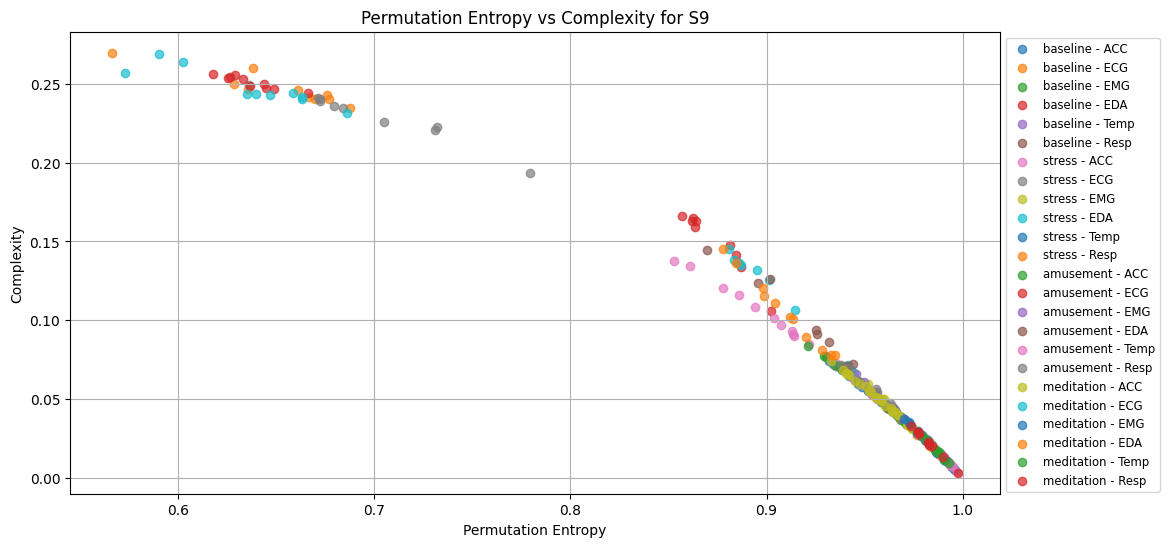

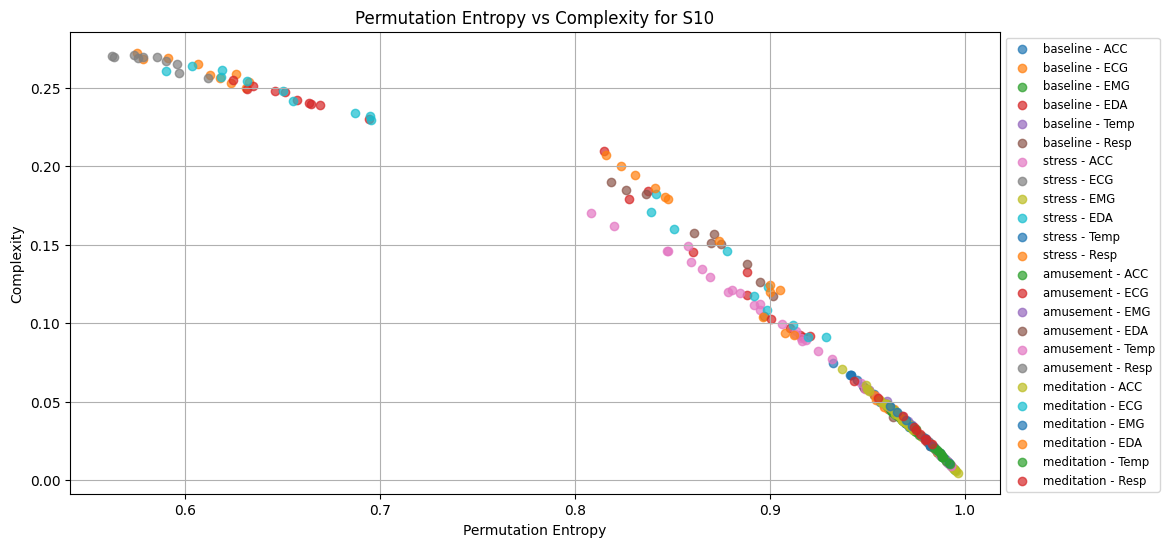

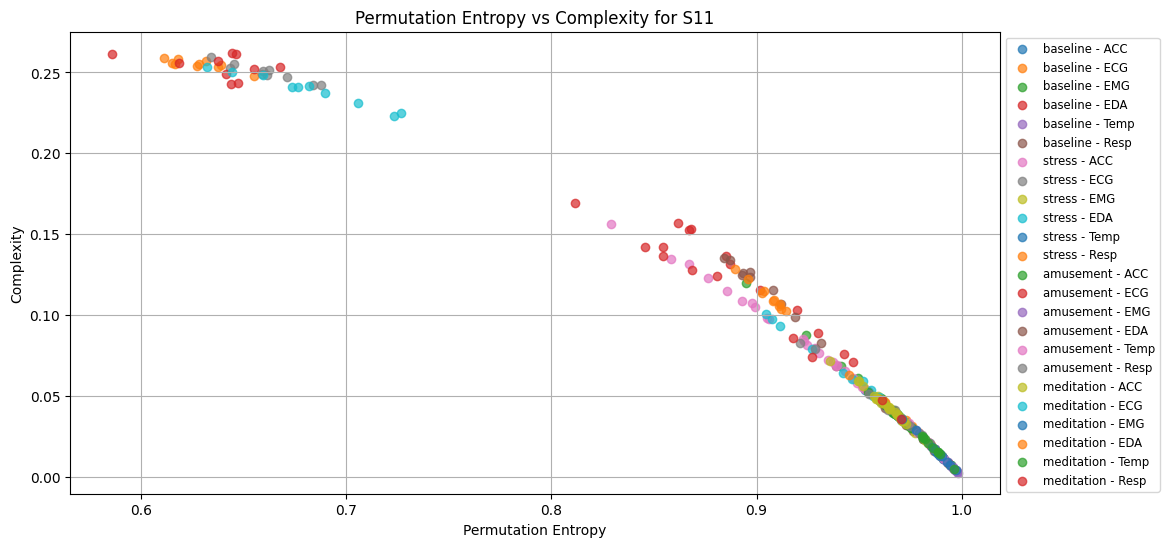

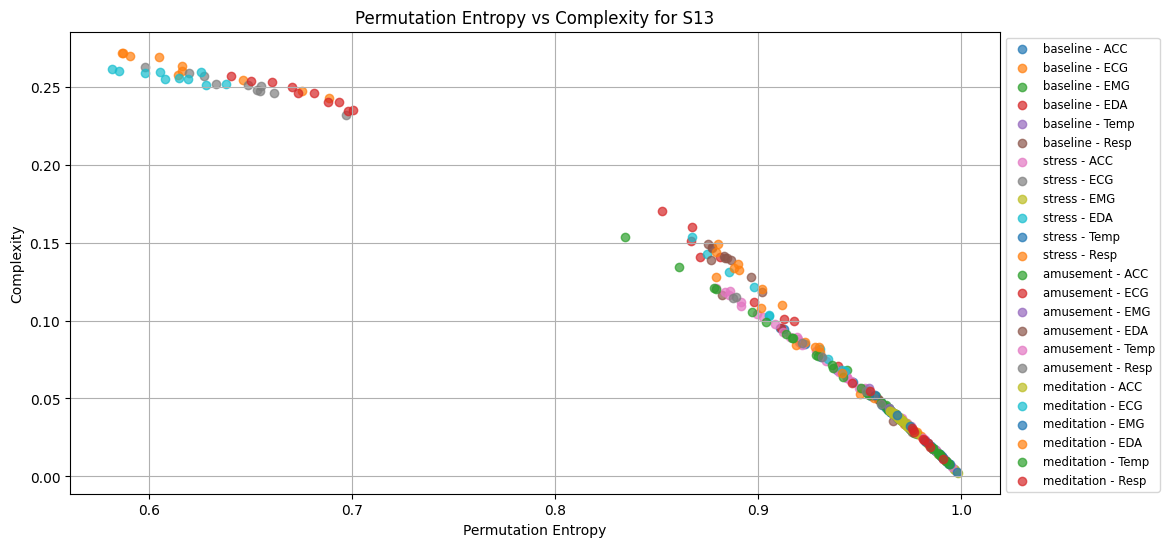

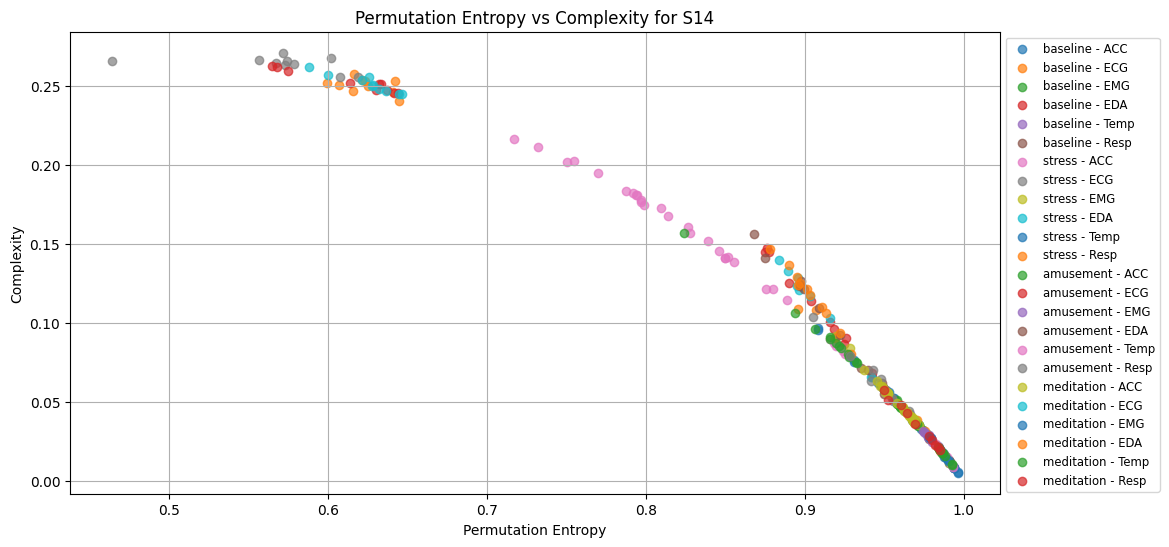

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Calculating permutation entropy and complexity for the sampled signals
def calculate_pe_and_pc_for_signals(sampled_signals, D=4, tau=1):
    
    # Initialize dictionaries to store permutation entropy and complexity values
    # Store with state as the top level keys and then by modality
    pe_values = {state: {modality: [] for modality in sampled_signals[state]} for state in sampled_signals}
    pc_values = {state: {modality: [] for modality in sampled_signals[state]} for state in sampled_signals}
    
    # Loop through each state
    for state in sampled_signals:
        
        # Loop through each modality
        for modality in sampled_signals[state]:
            
            # Loop through each signal sample for that modality
            for signal in sampled_signals[state][modality]:
                
                # If the signal has more than one channel (ACC), loop through the channels
                if signal.shape[-1] > 1: 
                    
                    # Process each channel separately
                    for channel_idx in range(signal.shape[-1]):
                        
                        # Extract the channel
                        channel_signal = signal[..., channel_idx].reshape(-1)
                        
                        # Step 1: Compute ordinal patterns
                        ordinal_patterns_result = ordinal_patterns(channel_signal, embdim=D, embdelay=tau)
                        
                        # Step 2: Calculate permutation entropy (PE)
                        pe = p_entropy(ordinal_patterns_result)
                        
                        # Step 3: Calculate complexity
                        pc = complexity(ordinal_patterns_result)
                        
                        # Store PE and complexity values
                        pe_values[state][modality].append(pe)
                        pc_values[state][modality].append(pc)
                
                else:
                    # For single-channel signals, just process as usual
                    signal = signal.reshape(-1) 
                    
                    # Step 1: Compute ordinal patterns
                    ordinal_patterns_result = ordinal_patterns(signal, embdim=D, embdelay=tau)
                    
                    # Step 2: Calculate permutation entropy (PE)
                    pe = p_entropy(ordinal_patterns_result)
                    
                    # Step 3: Calculate complexity
                    pc = complexity(ordinal_patterns_result)
                    
                    # Store PE and complexity values
                    pe_values[state][modality].append(pe)
                    pc_values[state][modality].append(pc)
                
    return pe_values, pc_values

# Dictionary to store permutation entropy and complexity for each subject
subject_pe_pc = {}

# Loop through each subject
for subject in subjects:
    sampled_signals = sampled_data_dict[subject] 

    # Call function and calculate permutation entropy and complexity
    pe_values, pc_values = calculate_pe_and_pc_for_signals(sampled_signals)
    
    # Store the results
    subject_pe_pc[subject] = (pe_values, pc_values)

    # Create a scatter plot for this subject
    plt.figure(figsize=(12, 6))
    plt.title(f"Permutation Entropy vs Complexity for {subject}")
    
    # Plot PE vs PC for each state and modality
    for state in pe_values:
        for modality in pe_values[state]:
            plt.scatter(pe_values[state][modality], pc_values[state][modality], label=f"{state} - {modality}", alpha=0.7)
    
    # Formatting the plot
    plt.xlabel("Permutation Entropy")
    plt.ylabel("Complexity")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small", frameon=True)
    plt.grid(True)
    plt.show()



#### Comments on the plot above:
##### Permutation entropy on the x-axis shows how random or unpredictable the signal is, and complexity on the y-axis shows how structured the signal is. Each dot represents a modality measured under a certain state. All 5 subjects have a downward trend, as permutation entropy gets higher, complexity decreases. Meaning as the data from the chest signals gets more random, it also gets less structured. 
##### Looking at the data from each combination of state and modality, in the upper-left corner is less random but more structured, and the bottom-right corner is more random but less structured. I will look at scatter plots for each subject by modality to understand it better. 

#### Plotting scatter plots by modality to compare states for each subject

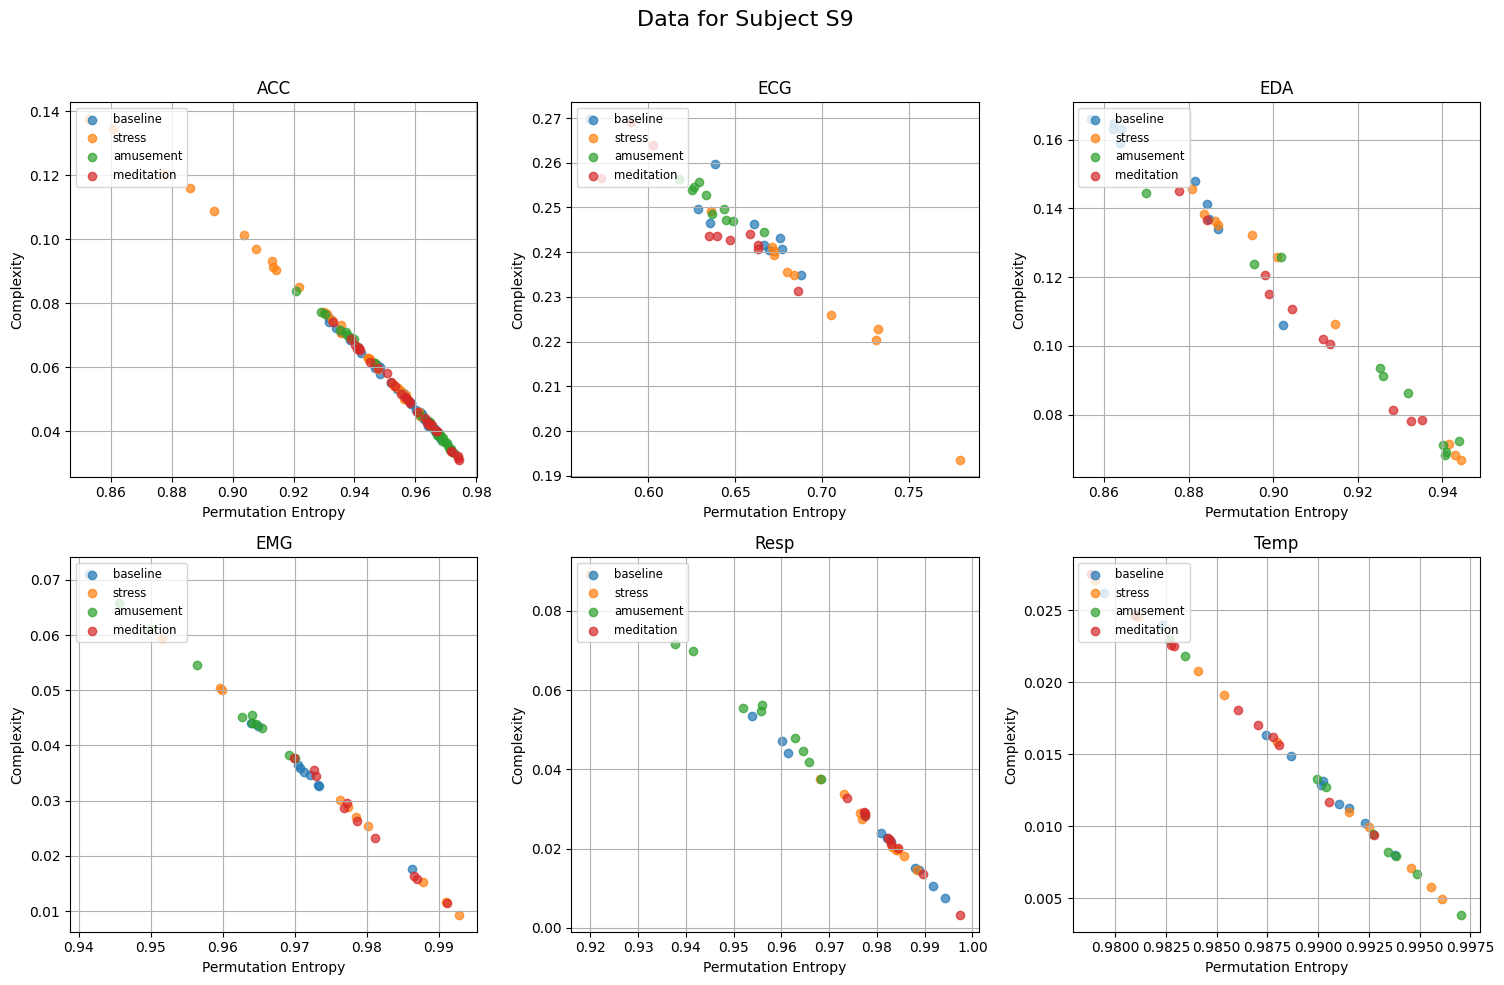

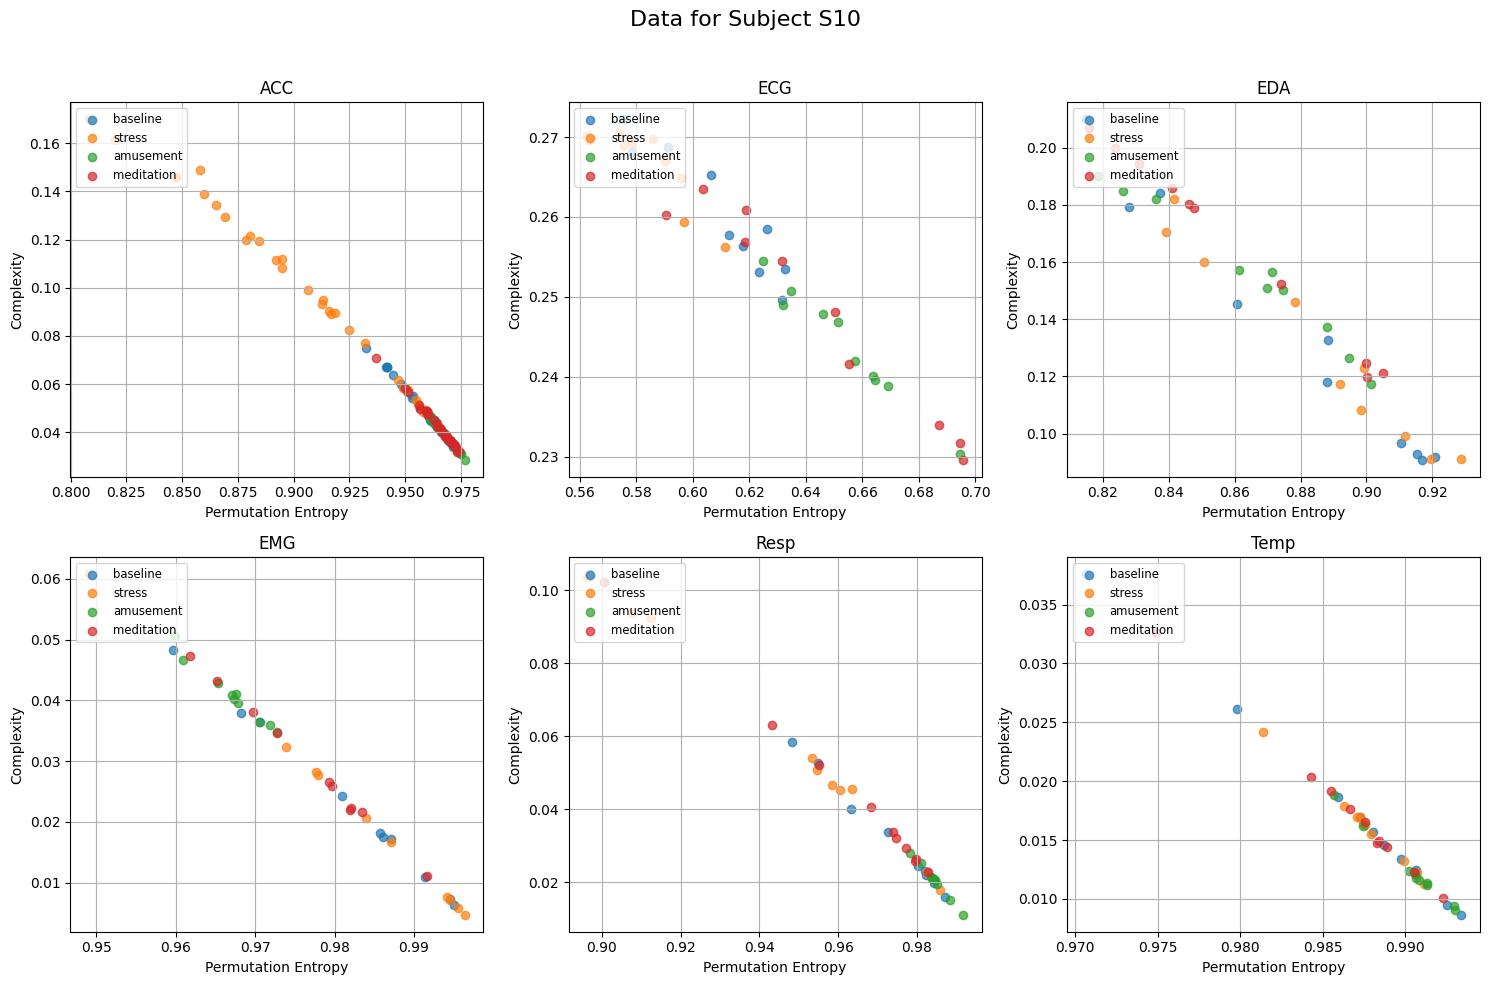

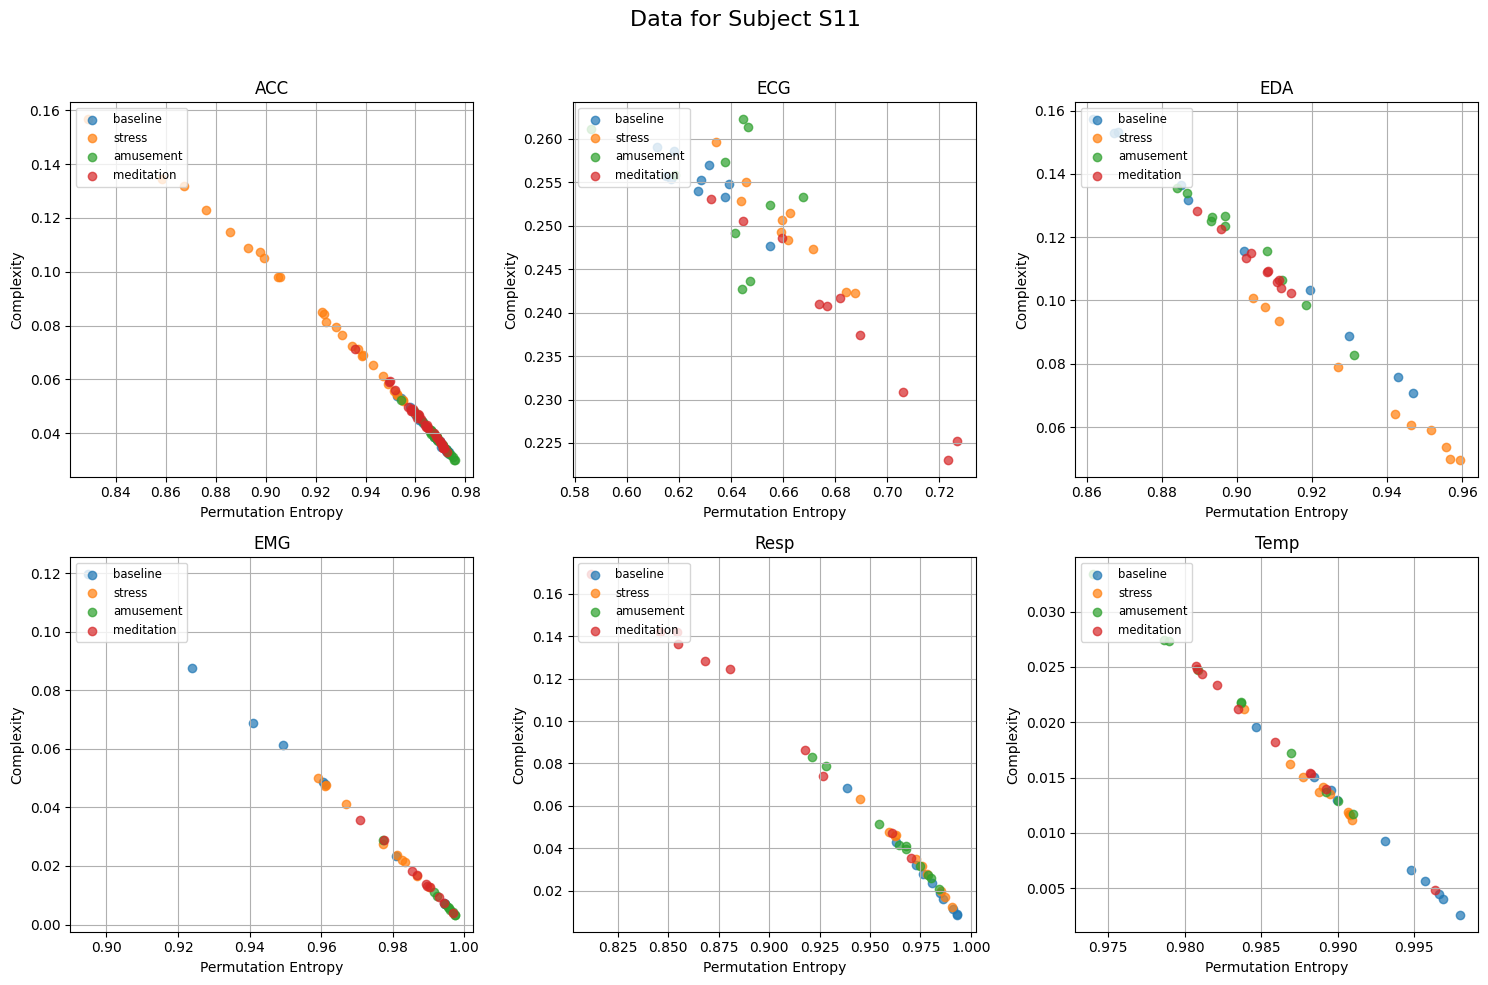

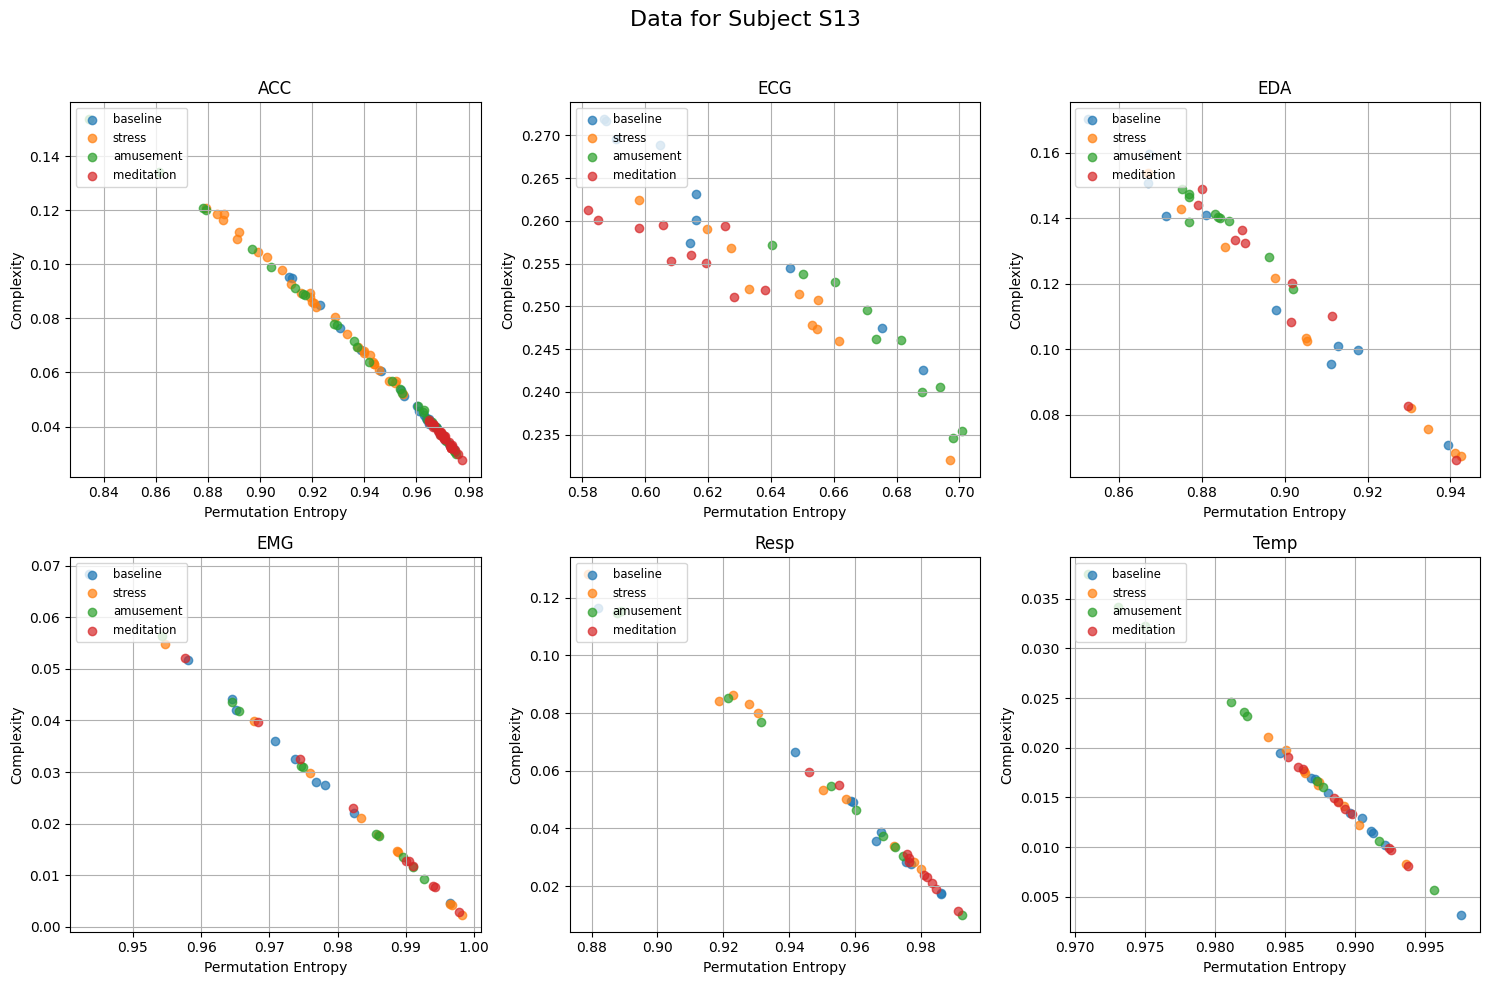

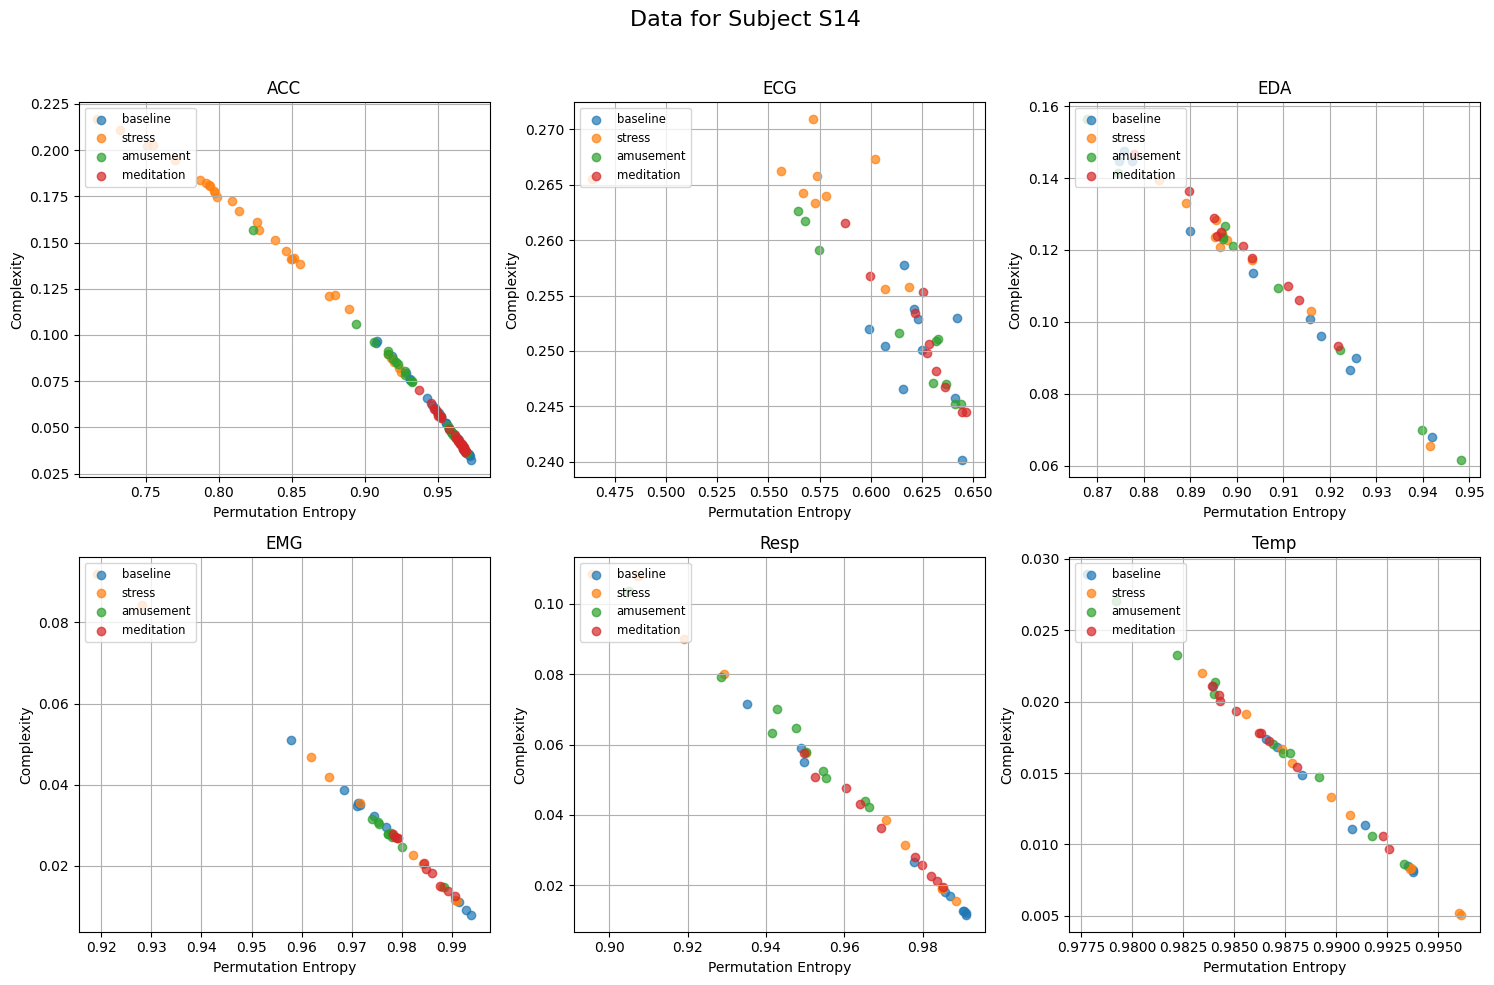

In [47]:
# List of modalities
modalities = ['ACC', 'ECG', 'EDA', 'EMG', 'Resp', 'Temp']

# Loop through each subject
for subject in subjects:
    sampled_signals = sampled_data_dict[subject] 

    # Call function and calculate permutation entropy and complexity
    pe_values, pc_values = calculate_pe_and_pc_for_signals(sampled_signals)
    
    # Store the results
    subject_pe_pc[subject] = (pe_values, pc_values)

    # Create a figure with 6 subplots one for each modality
    fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
    fig.suptitle(f"Data for Subject {subject}", fontsize=16)

    axes = axes.flatten()

    # Loop through each modality to create a scatter plot in its subplot
    for i, modality in enumerate(modalities):
        ax = axes[i] 
        ax.set_title(f"{modality}")

        # Plot permutation entropy vs. Complexity for each state for this modality
        for state in pe_values:
            if modality in pe_values[state]:
                ax.scatter(pe_values[state][modality], pc_values[state][modality], label=f"{state}", alpha=0.7)

        # Formatting each subplot
        ax.set_xlabel("Permutation Entropy")
        ax.set_ylabel("Complexity")
        ax.legend(loc="upper left", fontsize="small", frameon=True)
        ax.grid(True)

    # Make subplots fit
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 

    # Show the figure with all subplots
    plt.show()


#### Tasks requested by professor

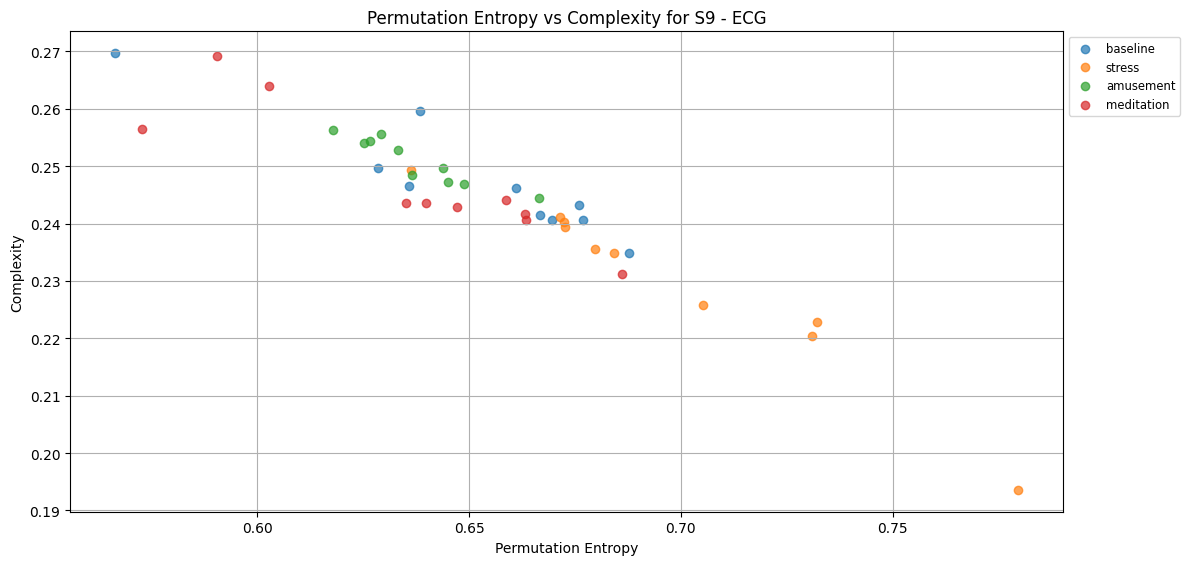

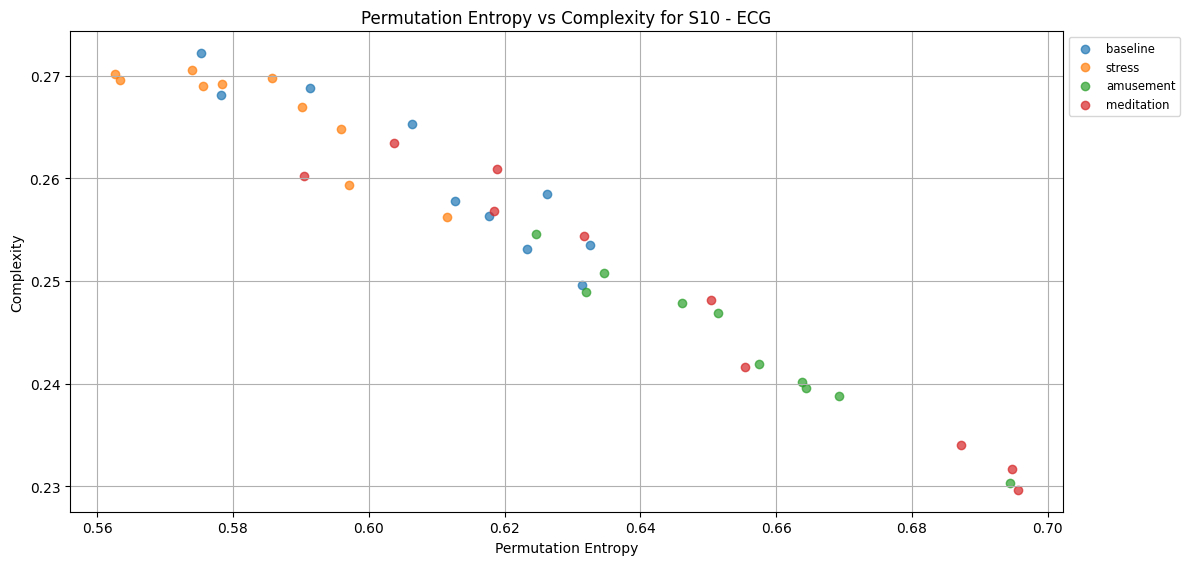

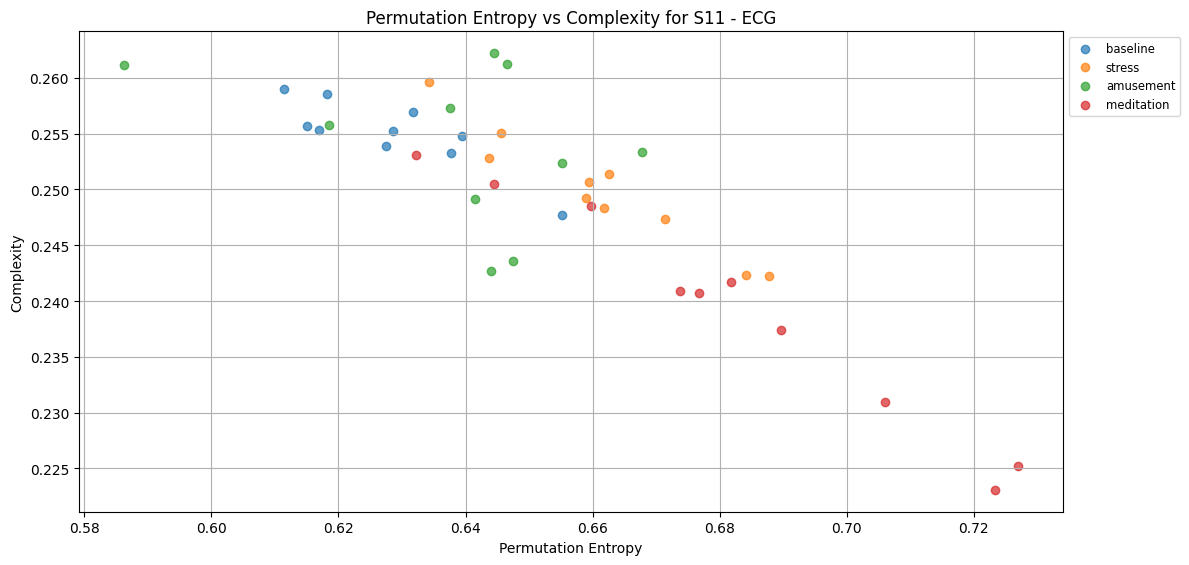

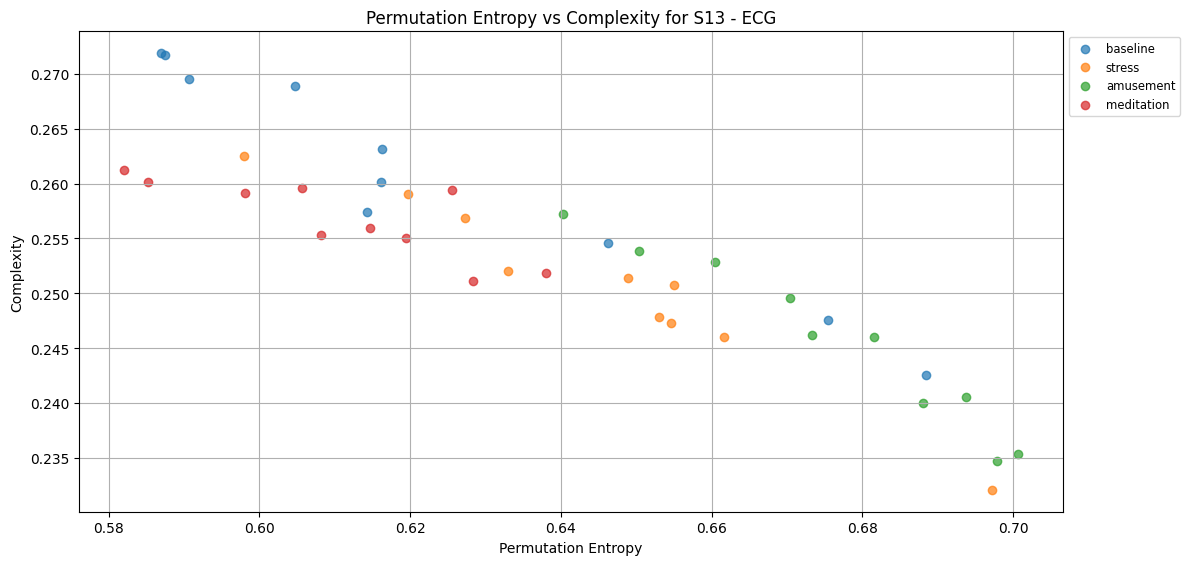

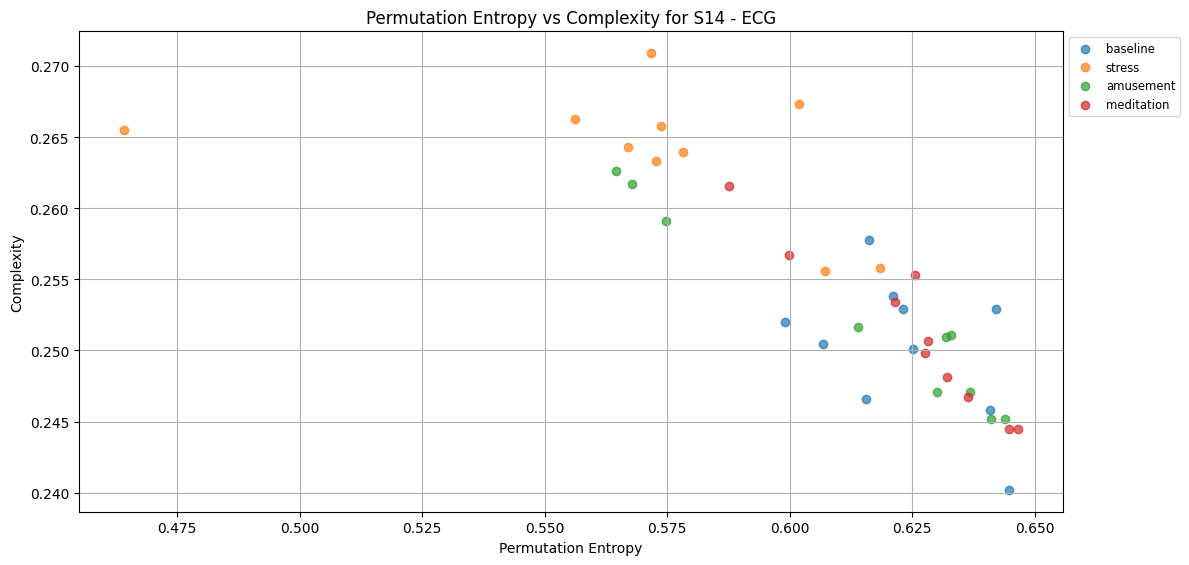

In [ ]:
# ECG modality only 
modalities = ['ECG']

# Loop through each subject
for subject in subjects:
    sampled_signals = sampled_data_dict[subject] 

    # Call function and calculate permutation entropy and complexity
    pe_values, pc_values = calculate_pe_and_pc_for_signals(sampled_signals)
    
    # Store the results
    subject_pe_pc[subject] = (pe_values, pc_values)

    # For loop to create a scatter plot for each subject for ECG modality
    for modality in modalities:
        plt.figure(figsize=(12, 6))
        plt.title(f"Permutation Entropy vs Complexity for {subject} - {modality}")
        plt.xlabel("Permutation Entropy")
        plt.ylabel("Complexity")

        # Plot PE vs PC for each state and modality
        for state in pe_values:
            if modality in pe_values[state]:
                plt.scatter(pe_values[state][modality], pc_values[state][modality], label=f"{state}", alpha=0.7)

        # Add legend after plotting all points
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small", frameon=True)

        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.96]) 
        plt.grid(True)

        # Show the figure
        plt.show()

